<a href="https://colab.research.google.com/github/jdcarrascali/Matematicas-del-aprendizaje-de-maquinas/blob/main/Eigen_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Eigenfaces

El principal objetivo del algoritmo PCA es la reducción de dimensinalidad. La idea detrás del algoritmo se basa en realizar una proyección otrogonal de un data set en un subespacio más pequeño, de manera que los autovalores de esta proyección (componenetes principales) maximizan la varianza de los datos proyectados.

In [4]:
#Librerías utilizadas
import matplotlib.pyplot as plt
import numpy as np
import os

%load_ext autoreload
%autoreload 2
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)



Mounted at /content/drive/


In [6]:
#Extracción del archivo .zip
#import zipfile  # For faster extraction
#dataset_path = "/content/drive/MyDrive/svm/lfwcrop_grey.zip"  # Replace with your dataset path
#zfile = zipfile.ZipFile(dataset_path)
#zfile.extractall()

In [10]:
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

Trabajamoos únicamente 1000 imágenes para reducir el tiempo de cómputo. Para observar la efectividad del algoritmo, observe primero algunos ejemplos del data set.


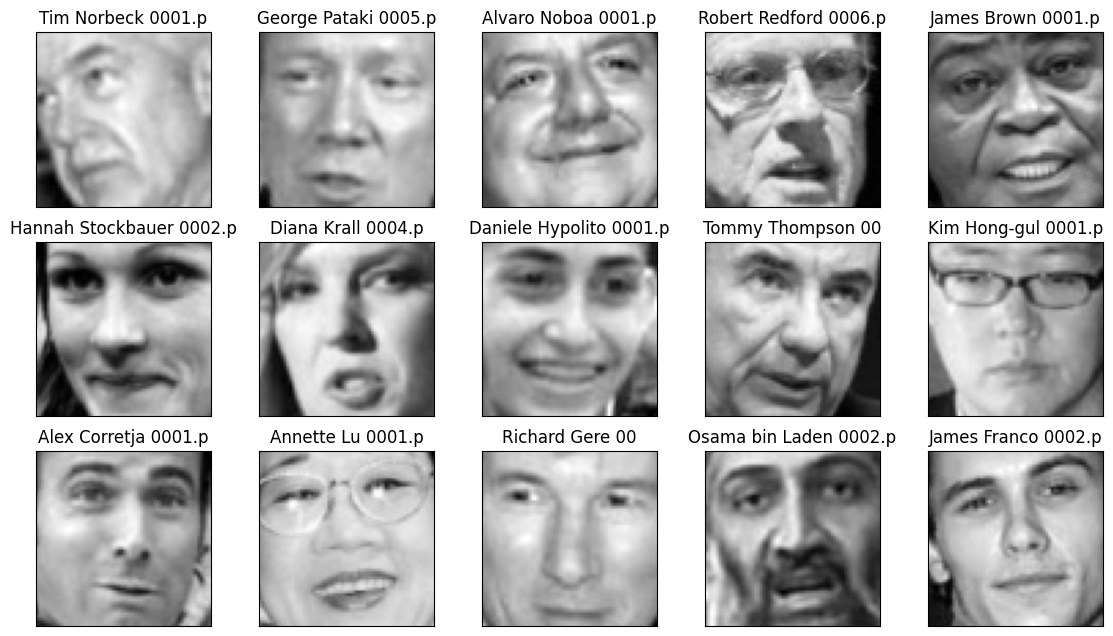

In [11]:
dir='lfwcrop_grey/faces'
celebrity_photos=os.listdir(dir)[1:1001]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
celebrity_names=[name[:name.find('9')-1].replace("_", " ") for name in celebrity_photos]
n_samples, h, w = images.shape
plot_portraits(images, celebrity_names, h, w, n_row=3, n_col=5)

In [12]:
def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data

Seleccionando 50 componentes principales obtenemos la siguiente base de "eigenfaces"

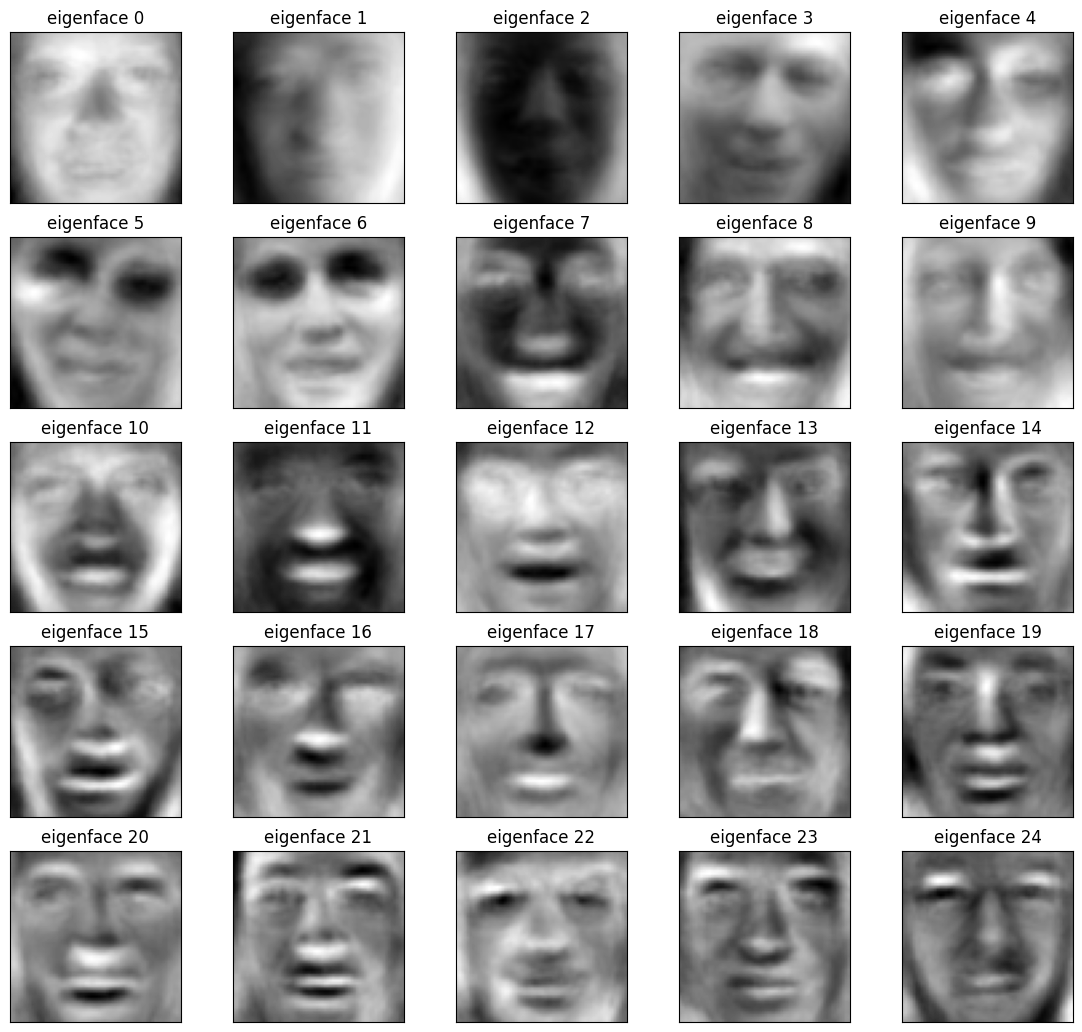

In [15]:
n_components = 50
X = images.reshape(n_samples, h*w)
P, C, M, Y= pca(X, n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 5, 5) 

Y observamos un bajo desempeño al momento de reconstruir las imágenes originales a partir de estas componentes principales.

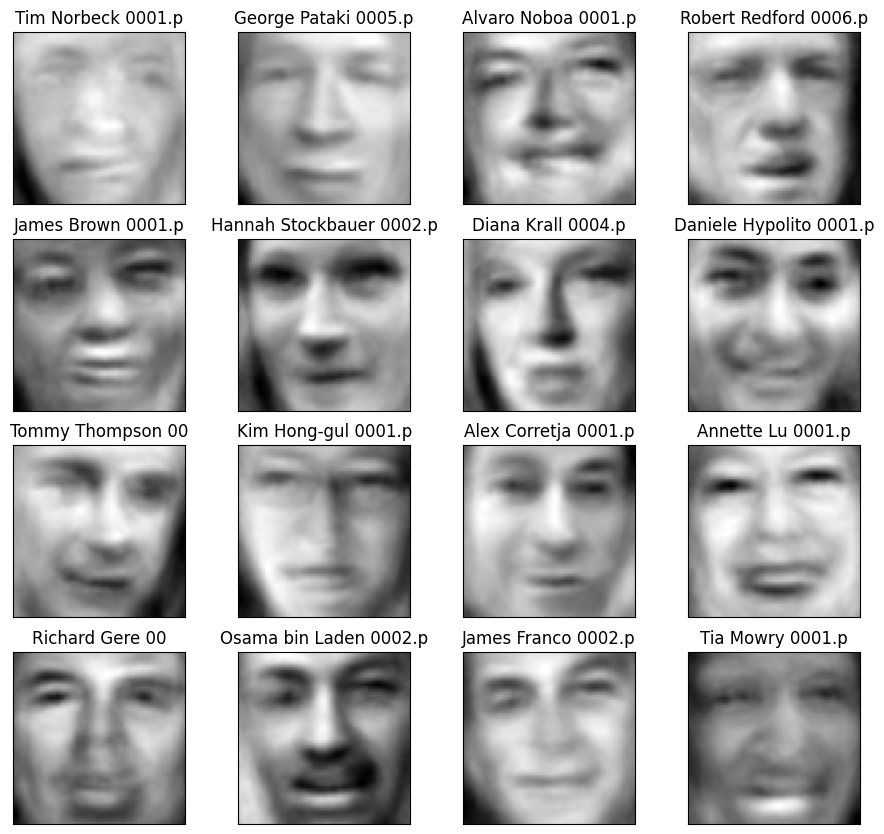

In [14]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
plot_portraits(recovered_images, celebrity_names, h, w, n_row=4, n_col=4)

Sin embargo, sí aumentamos n=100, no observamos una mejora muy sustancial

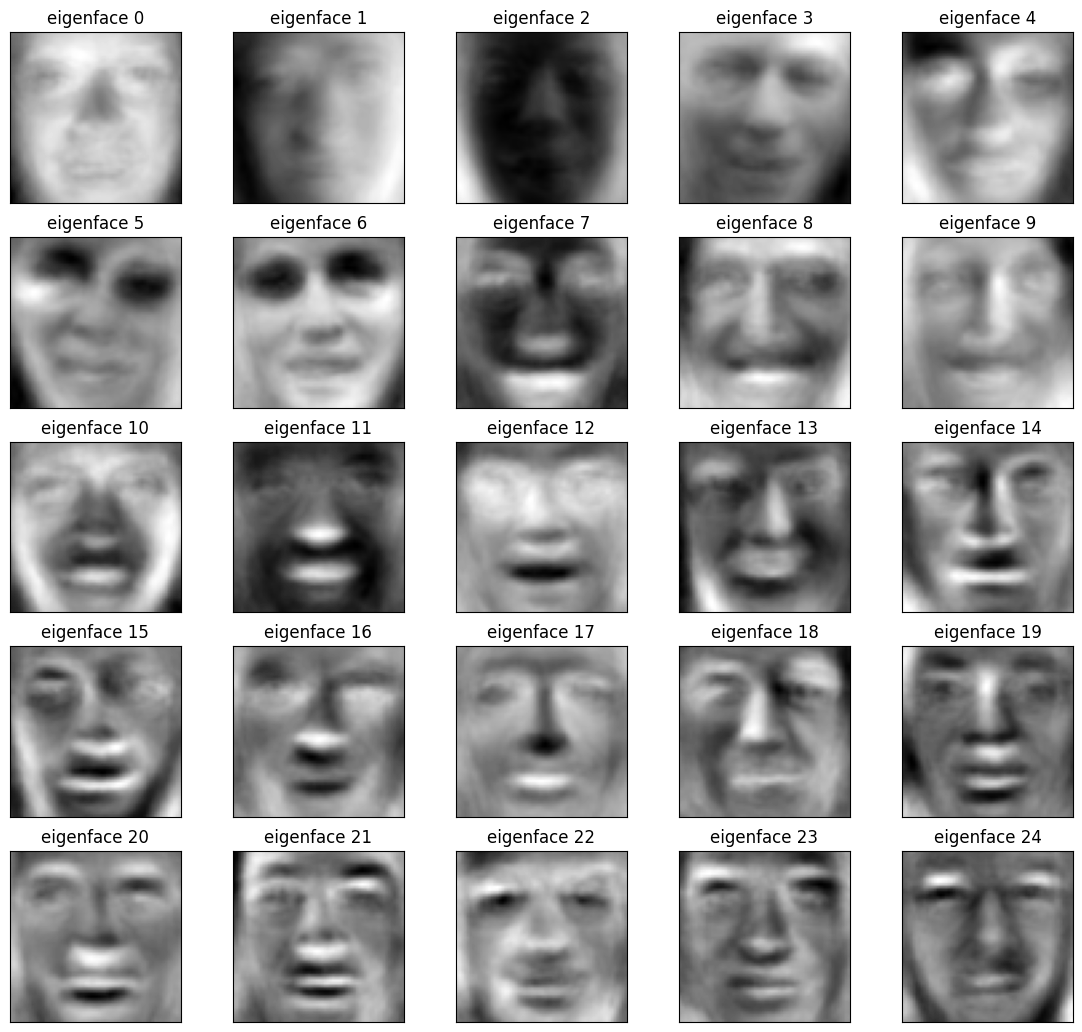

In [23]:
n_components = 100
X = images.reshape(n_samples, h*w)
P, C, M, Y= pca(X, n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 5, 5) 

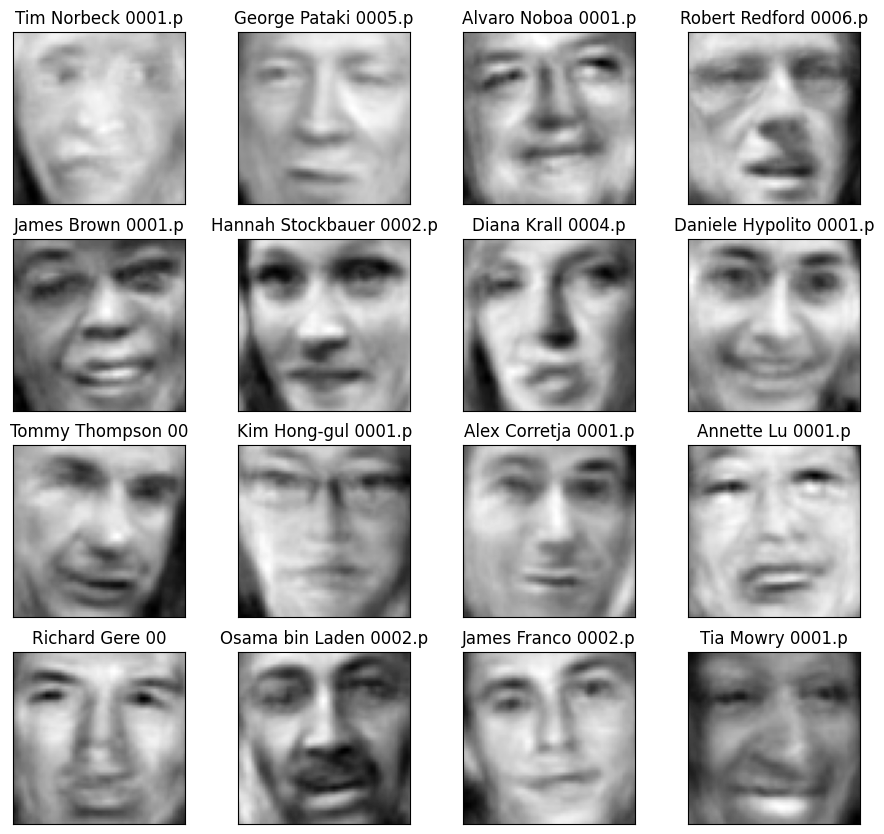

In [24]:
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
plot_portraits(recovered_images, celebrity_names, h, w, n_row=4, n_col=4)

Aumentando n=1000.

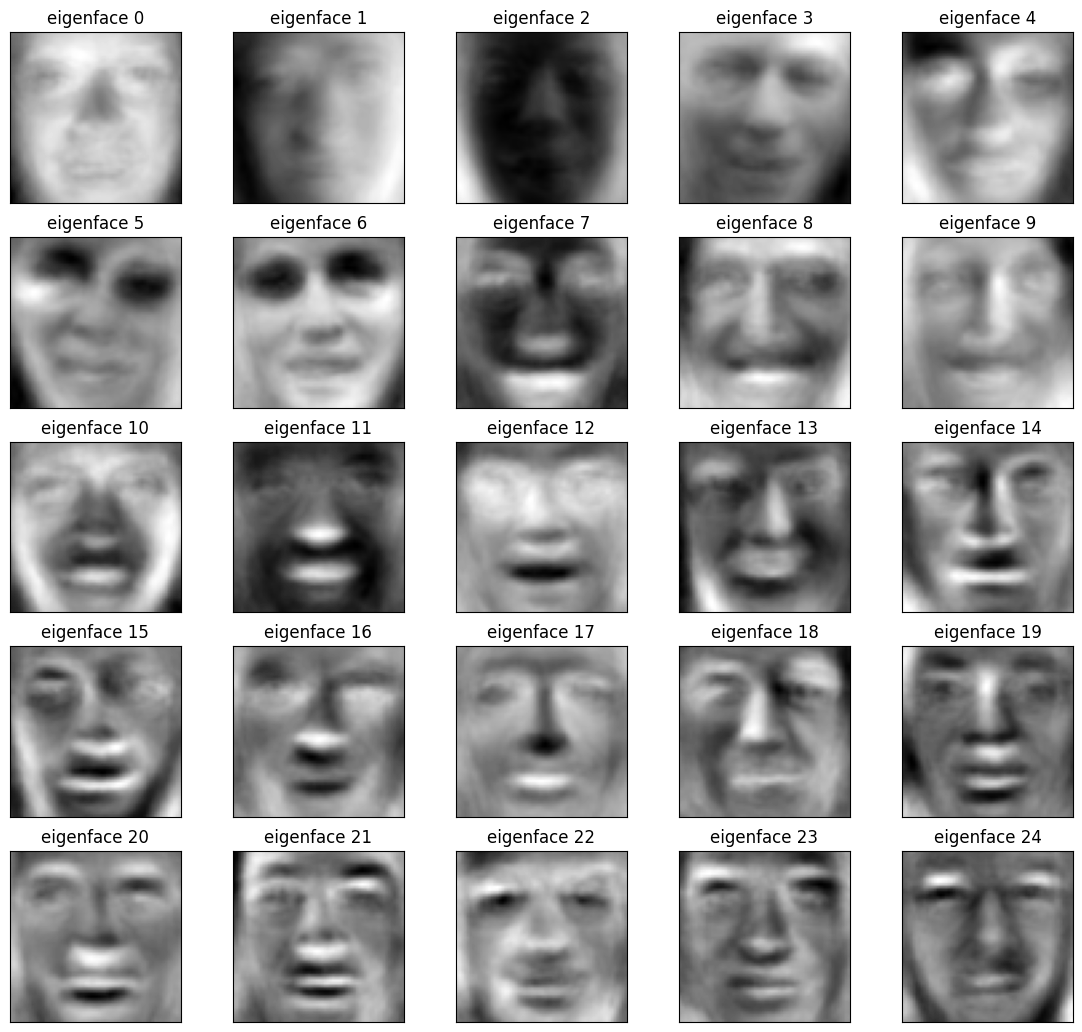

In [20]:
n_components = 1000
X = images.reshape(n_samples, h*w)
P, C, M, Y= pca(X, n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 5, 5) 

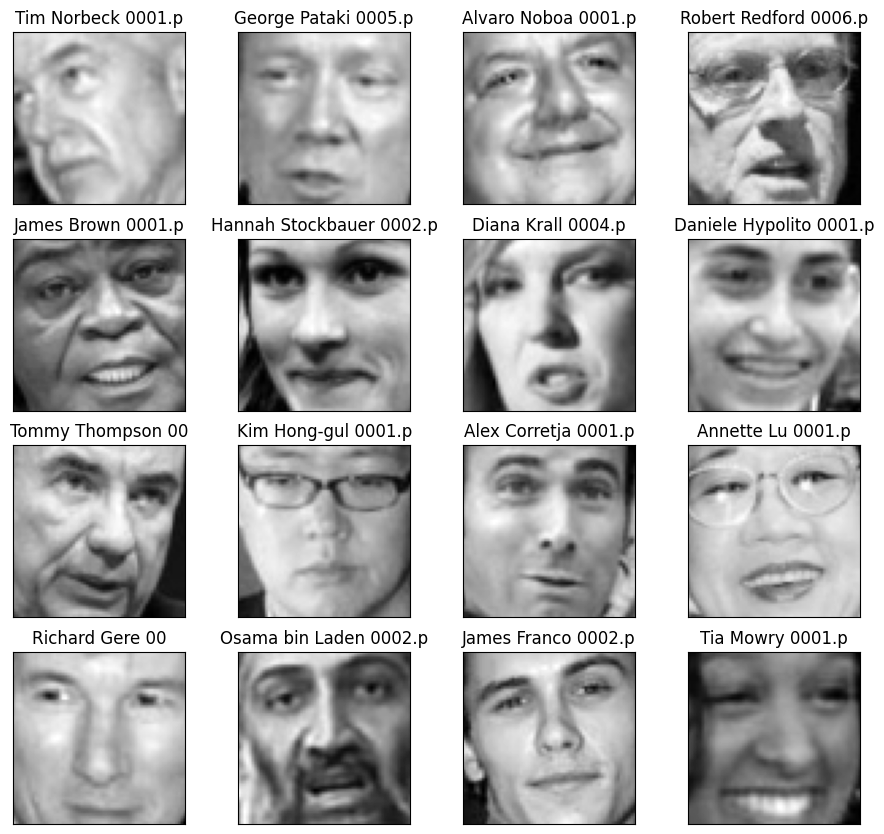

In [22]:
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
plot_portraits(recovered_images, celebrity_names, h, w, n_row=4, n_col=4)